In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(123)
months = pd.date_range(start="2024-01-01", periods=12, freq='M')
finance = pd.DataFrame({
    'month': months,
    'allocated_budget': np.random.randint(800000, 1200000, size=12),
    'actual_spent': np.random.randint(600000, 1150000, size=12),
})

finance['variance'] = finance['allocated_budget'] - finance['actual_spent']
finance['utilization_pct'] = (finance['actual_spent'] / finance['allocated_budget'] * 100).round(2)

print("\n✅ Finance Data Sample:")
display(finance.head())


✅ Finance Data Sample:


C:\Users\USER\AppData\Local\Temp\ipykernel_15596\1855424042.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start="2024-01-01", periods=12, freq='M')


,month,allocated_budget,actual_spent,variance,utilization_pct
0,2024-01-31,1049342,665632,383710,63.43
1,2024-02-29,1077869,1048625,29244,97.29
2,2024-03-31,828030,849903,-21873,102.64
3,2024-04-30,817730,718857,98873,87.91
4,2024-05-31,992476,1114272,-121796,112.27


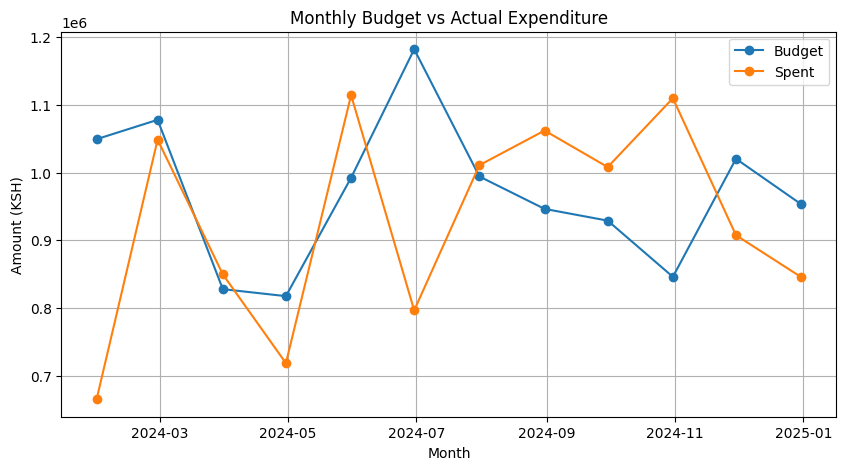

In [5]:
plt.figure(figsize=(10,5))
plt.plot(finance['month'], finance['allocated_budget'], marker='o', label='Budget')
plt.plot(finance['month'], finance['actual_spent'], marker='o', label='Spent')
plt.title("Monthly Budget vs Actual Expenditure")
plt.xlabel("Month")
plt.ylabel("Amount (KSH)")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15596\3921732834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='utilization_pct', data=finance, palette='coolwarm')


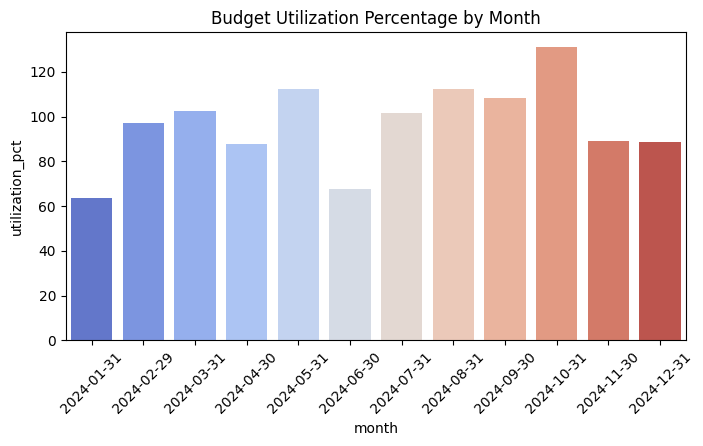

In [7]:
plt.figure(figsize=(8,4))
sns.barplot(x='month', y='utilization_pct', data=finance, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Budget Utilization Percentage by Month")
plt.show()


⚠️ Spending Flags Summary:
flag
Normal         7
Over-spent     3
Under-spent    2
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_15596\251508031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flag', data=finance, palette='coolwarm')


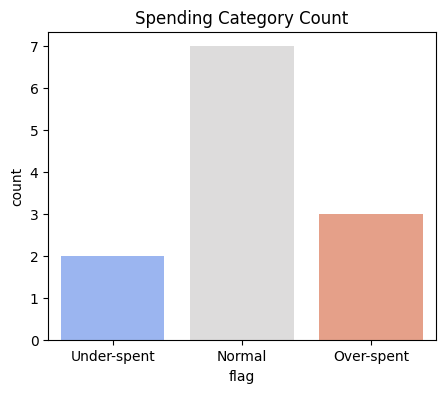

In [8]:
# Identify red flags (over/under spending)
finance['flag'] = np.where(finance['utilization_pct'] > 110, 'Over-spent',
                  np.where(finance['utilization_pct'] < 85, 'Under-spent', 'Normal'))
flag_summary = finance['flag'].value_counts()
print("\n⚠️ Spending Flags Summary:")
print(flag_summary)

plt.figure(figsize=(5,4))
sns.countplot(x='flag', data=finance, palette='coolwarm')
plt.title("Spending Category Count")
plt.show()
# --- IGNORE ---